In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gene_id import Gene_IDs
from atac_signal import ATAC_signal
from gene_sets import Gene_sets

import plotting as my_plots
import utilities as ut
import calc_signals as cas

In [2]:
if "gs" not in locals():
    gs = Gene_sets()

if "exp1" not in locals():
    exp1 = ATAC_signal("exp1")

if "exp_mss" not in locals():
    exp_mss = ATAC_signal("exp_metsetset")

if "exp_hrde1" not in locals():
    exp_hrde1 = ATAC_signal("exp_hrde_guy")

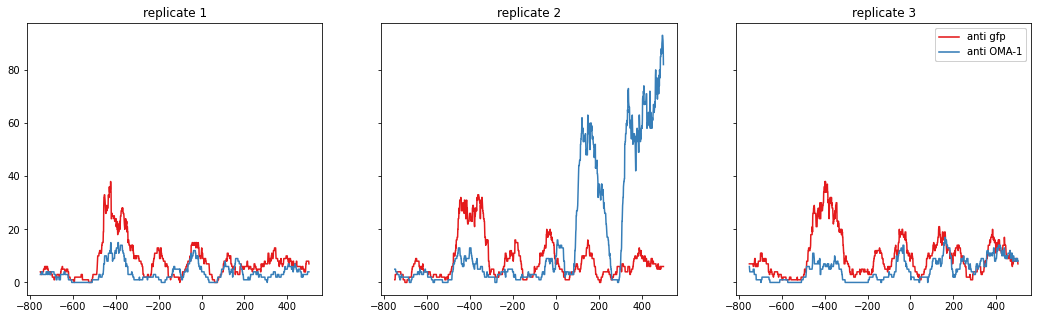

In [3]:
my_plots.plot_signal_gene(exp_mss, 'oma-1', plot_range=(-750, 500), var_type='sem', mean_flag=False)

In [4]:
my_plots.plot_signal_gene(exp_mss, 'GF', plot_range=(-750, 500), var_type='sem', mean_flag=False)

KeyError: False

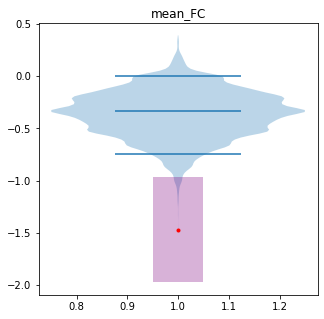

Gene - oma-1

Value:	-1.47
Rank: 1.0 (0.00%)



In [50]:
my_plots.plot_gene_atac_signal_distribution(exp_mss, 'oma-1', mean_flag=True)

In [6]:
## hrde-1 lists:
hrde1_kennedy = gs.get_list('hrde-1-Kennedy')
hrde_FC_sig = gs.get_list('mRNA_isSig')
hrde_up = gs.get_list('mRNA_log2_FC', thresh=0)
hrde_up_sig = ut.intersect_lists(hrde_FC_sig, hrde_up)
hrde_down = gs.get_list('mRNA_log2_FC', thresh=0, bottom=True)
hrde_down_sig = ut.intersect_lists(hrde_FC_sig, hrde_down)
hrde_regulated = ut.intersect_lists(hrde_up_sig, hrde1_kennedy)

hrde1_nearby_up, hrde1_nearby_down = ut.get_nearby_genes_list(hrde_regulated, 2000) # len 75, len 28
hrde1_nearby_up_1200, hrde1_nearby_down_1200 = ut.get_nearby_genes_list(hrde_regulated, 1200) # len 49, len 7

hrde_dic = {'hrde1_kennedy':hrde1_kennedy, 'hrde_reg':hrde_regulated, 'hrde-1 upstream':hrde1_nearby_up, 'hrde down sig':hrde_down_sig}
    

missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00013153
missing gene: WBGene00019789
missing gene: WBGene00021673
missing gene: WBGene00000801
missing gene: WBGene00019517
missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00013153
missing gene: WBGene00019789
missing gene: WBGene00021673
missing gene: WBGene00000801
missing gene: WBGene00019517


These genes were found by Itamar to be...

gene WBGene00015351:


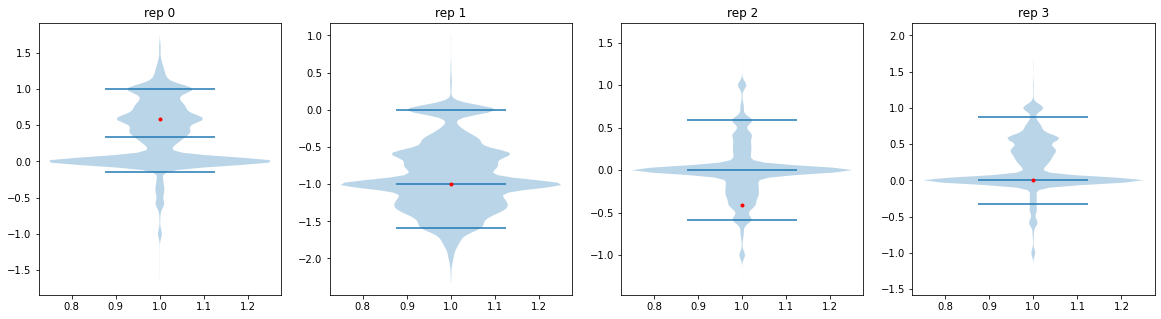

In [4]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00015351', mean_flag=False)

gene WBGene00016177:


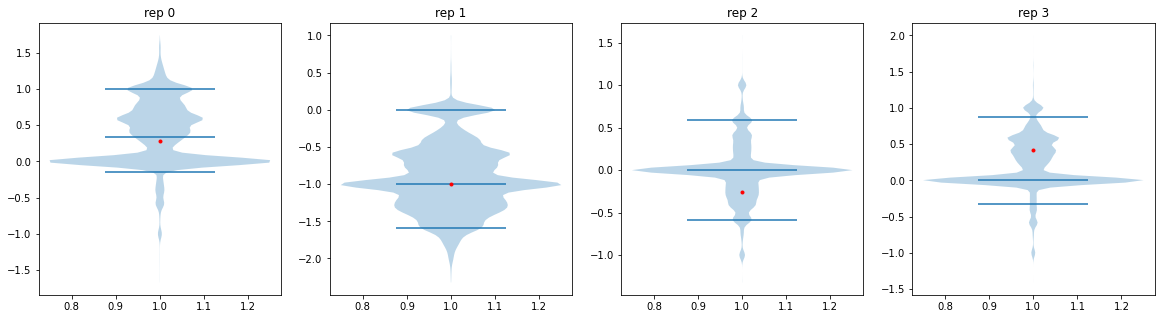

In [5]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00016177', mean_flag=False)

gene WBGene00000224:


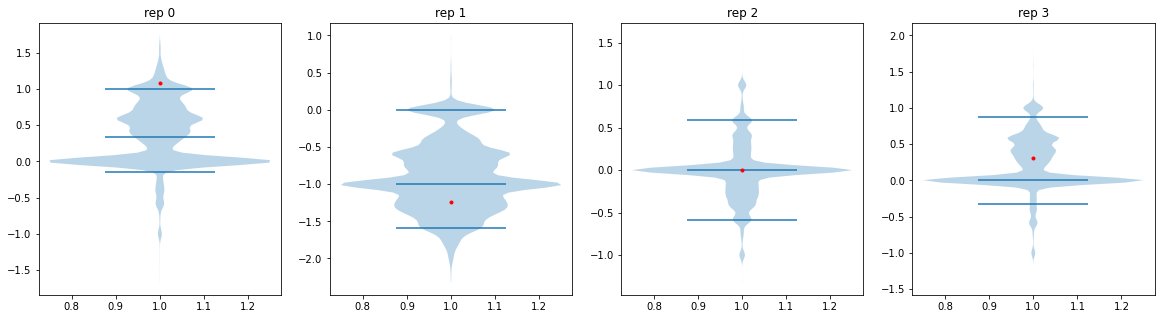

In [6]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00000224', mean_flag=False)

gene WBGene00013100:


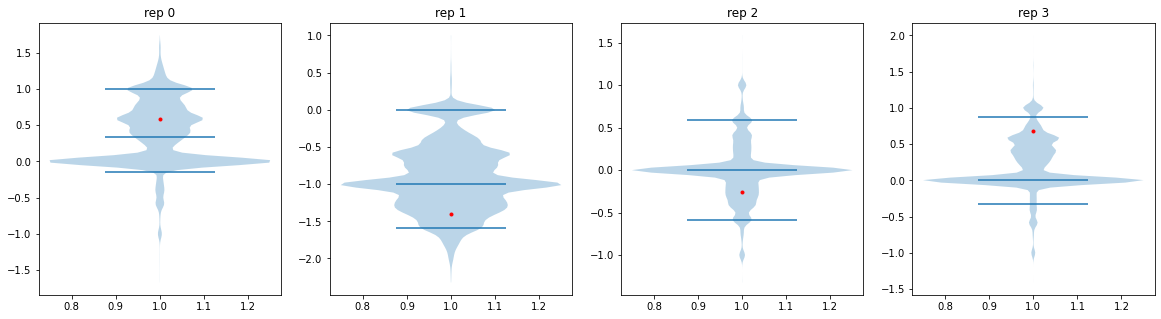

In [7]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00013100', mean_flag=False)

bigger than 999 out of 1000 bootstrap iterations


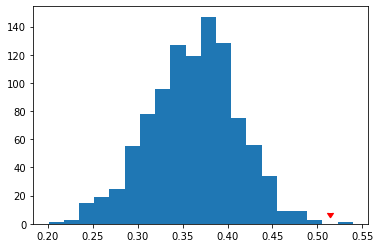

In [8]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 0'], hrde1_nearby_up) # ~99%

bigger than 1000 out of 1000 bootstrap iterations


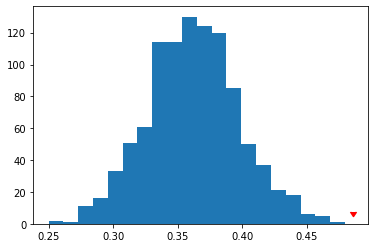

In [9]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 0'], hrde_regulated) #

bigger than 1 out of 1000 bootstrap iterations


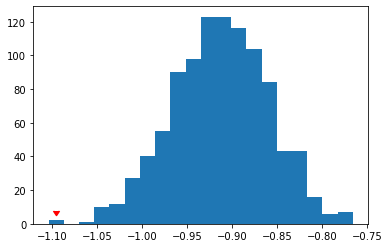

In [10]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 1'], hrde1_nearby_up) # ~1%

bigger than 0 out of 1000 bootstrap iterations


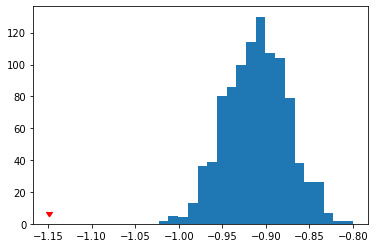

In [11]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 1'], hrde_regulated) #

bigger than 57 out of 1000 bootstrap iterations


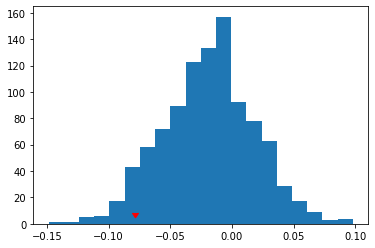

In [12]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 2'], hrde1_nearby_up) # 5%

bigger than 665 out of 1000 bootstrap iterations


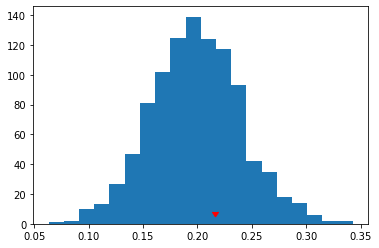

In [13]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 3'], hrde1_nearby_up) # 67%

bigger than 158 out of 1000 bootstrap iterations


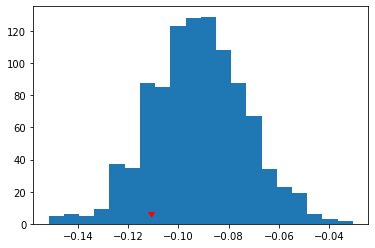

In [14]:
cas.bootstrap_group_score_fc_histogram(exp1.fc.mean(axis=1), hrde1_nearby_up) # 17%

Until now, it was all testing for exp1. Now it is for exp_hrde1, which is supposed to be relevant:

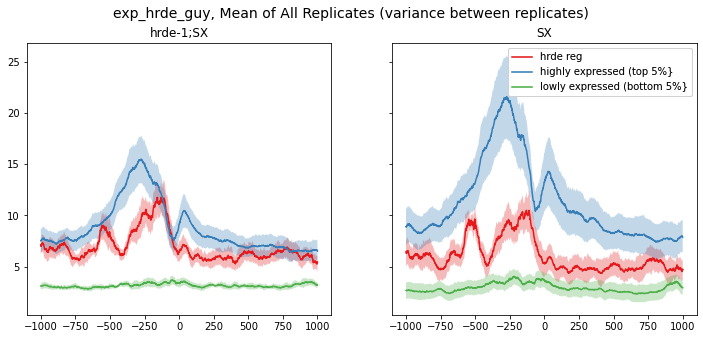

In [53]:
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde reg':hrde_regulated}, mean_flag=True)

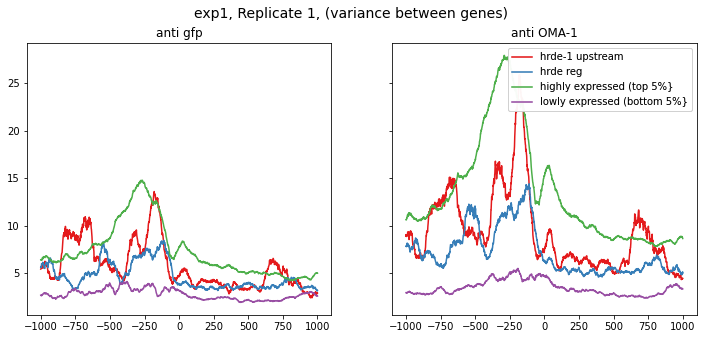

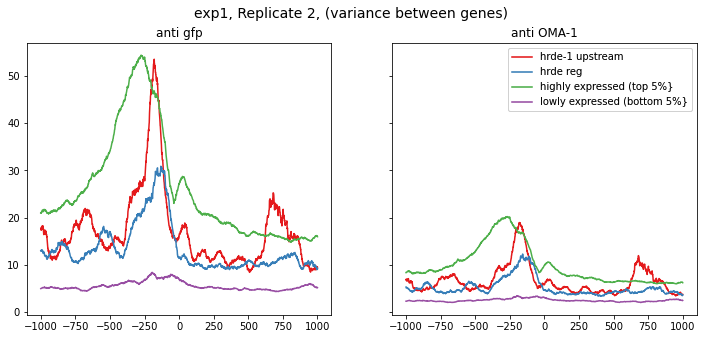

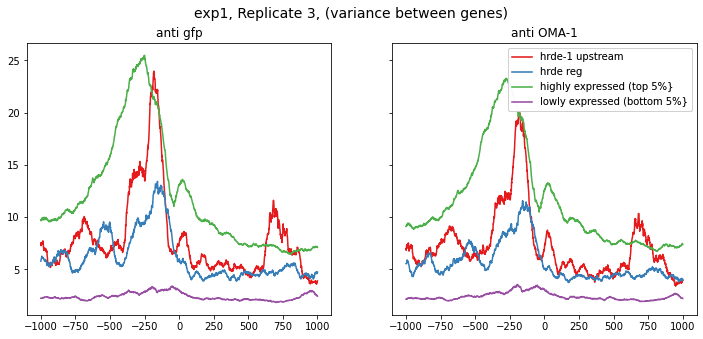

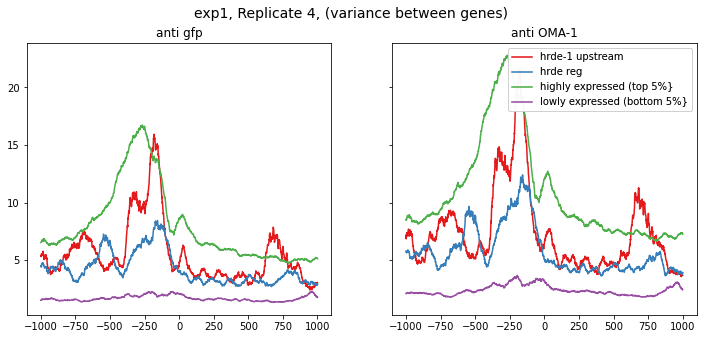

In [16]:
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde reg':hrde_regulated}, mean_flag=False, var_type='none')

bigger than 0 out of 1000 bootstrap iterations


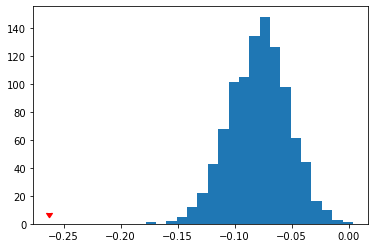

In [17]:
cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), hrde_regulated) # 0%

bigger than 479 out of 1000 bootstrap iterations


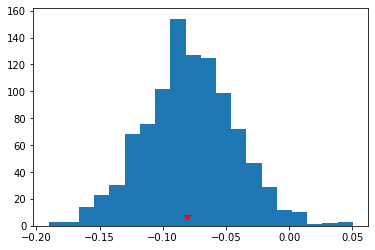

In [18]:
cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), hrde1_nearby_up) # 47%

This looks like the "hrde1_upstream" group has a pretty standard fold_change score! not good for us.

testthe function with random data:

In [19]:
genes_ind = exp1.fc.index
genes_cols = exp1.fc.columns
nums = np.random.rand(len(genes_ind),4)
rand_data = pd.DataFrame(nums, index = genes_ind, columns =genes_cols)

bigger than 777 out of 1000 bootstrap iterations


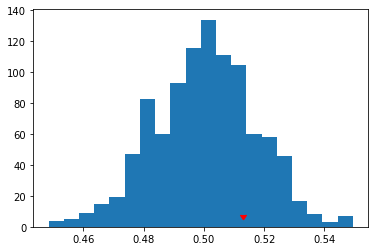

In [20]:
cas.bootstrap_group_score_fc_histogram(rand_data.mean(axis=1), hrde1_nearby_up)

bigger than 512 out of 1000 bootstrap iterations


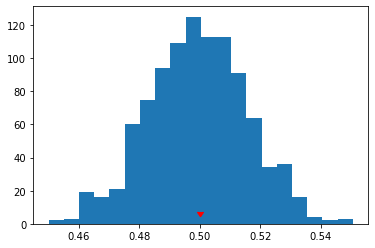

In [21]:
intersected_list = list(set(rand_data.index) & set(hrde1_nearby_up))
rand_data.loc[intersected_list,:]=0.5
cas.bootstrap_group_score_fc_histogram(rand_data.mean(axis=1), hrde1_nearby_up)

Biological questions:

In [22]:
exp_hrde1.exp_df

hrde-1;SX  \
rep                                                      
0                    -1000  -999   -998   -997   -9...   
1                    -1000  -999   -998   -997   -9...   
2                    -1000  -999   -998   -997   -9...   

                                                    SX  
rep                                                     
0                    -1000  -999   -998   -997   -9...  
1                    -1000  -999   -998   -997   -9...  
2                    -1000  -999   -998   -997   -9...

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 1000, num  of genes:3
bigger than 580 out of 1000 bootstrap iterations


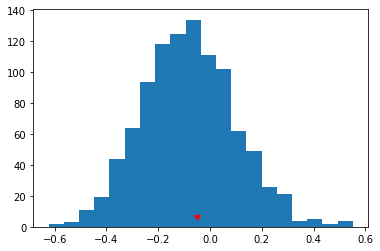

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 1500, num  of genes:15
bigger than 626 out of 1000 bootstrap iterations


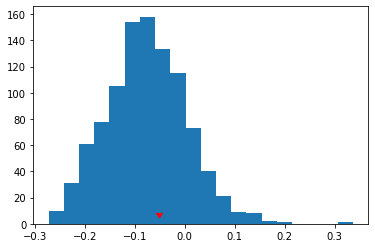

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 2000, num  of genes:28
bigger than 406 out of 1000 bootstrap iterations


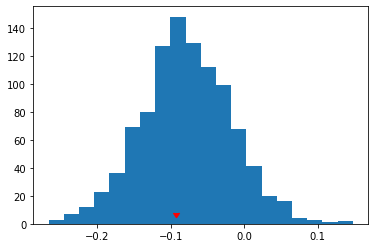

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 3000, num  of genes:55
bigger than 219 out of 1000 bootstrap iterations


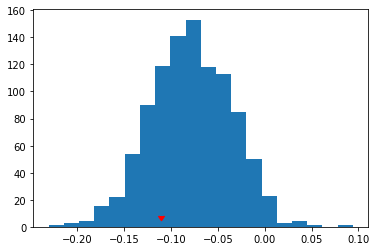

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 5000, num  of genes:91
bigger than 11 out of 1000 bootstrap iterations


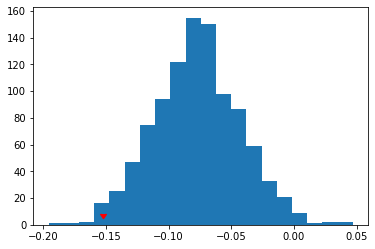

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 10000, num  of genes:205
bigger than 0 out of 1000 bootstrap iterations


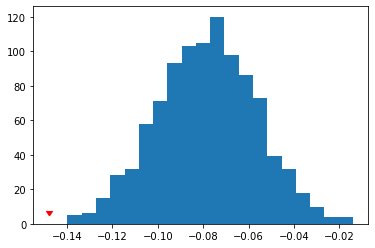

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 15000, num  of genes:316
bigger than 3 out of 1000 bootstrap iterations


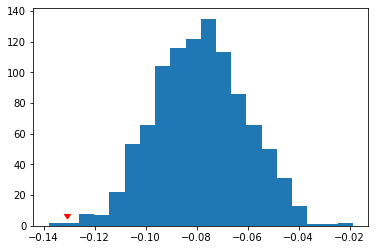

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 25000, num  of genes:523
bigger than 12 out of 1000 bootstrap iterations


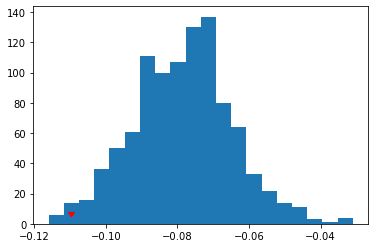

In [23]:
import matplotlib.pyplot as plt 
ds = [1000, 1500, 2000, 3000, 5000, 10000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    print(f'for distance: {distance}, num  of genes:{len(genes_down)}')
    cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), genes_down)
    plt.show()



missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 1000, num  of genes:39
bigger than 406 out of 1000 bootstrap iterations


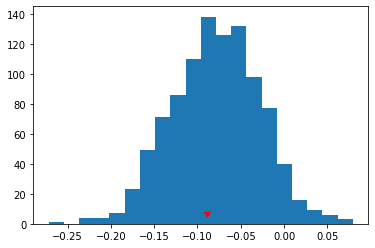

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 1500, num  of genes:59
bigger than 641 out of 1000 bootstrap iterations


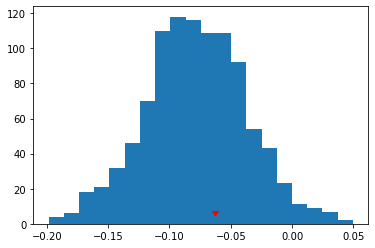

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 2000, num  of genes:75
bigger than 476 out of 1000 bootstrap iterations


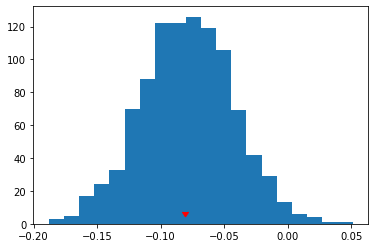

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 3000, num  of genes:108
bigger than 278 out of 1000 bootstrap iterations


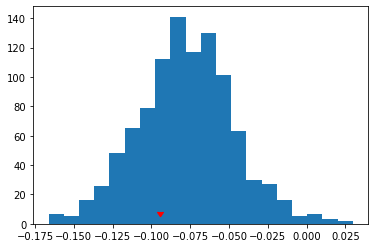

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 5000, num  of genes:162
bigger than 629 out of 1000 bootstrap iterations


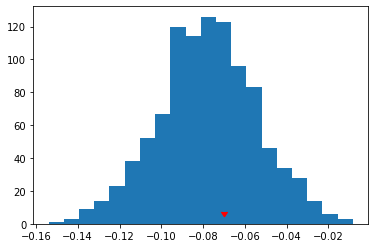

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 10000, num  of genes:313
bigger than 657 out of 1000 bootstrap iterations


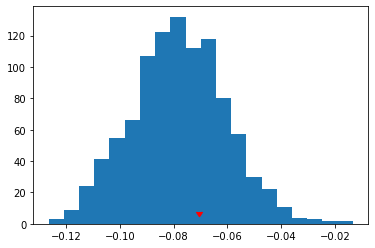

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 15000, num  of genes:450
bigger than 524 out of 1000 bootstrap iterations


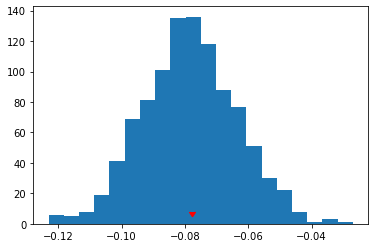

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862
for distance: 25000, num  of genes:701
bigger than 352 out of 1000 bootstrap iterations


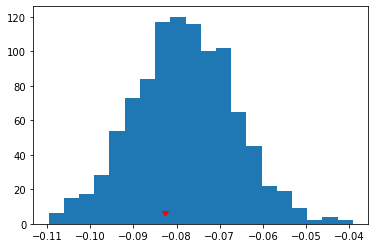

In [54]:
import matplotlib.pyplot as plt 
ds = [1000, 1500, 2000, 3000, 5000, 10000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    print(f'for distance: {distance}, num  of genes:{len(genes_up)}')
    cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), genes_up)
    plt.show()

missing gene: WBGene00010271
missing gene: WBGene00021673
missing gene: WBGene00015989
missing gene: WBGene00019517
missing gene: WBGene00019789
missing gene: WBGene00017729
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00045410
missing gene: WBGene00021886
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00018862


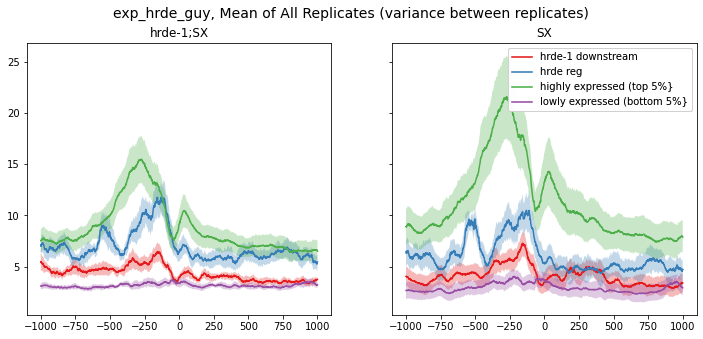

In [25]:
genes_up_10000, genes_down_10000 = ut.get_nearby_genes_list(hrde_regulated, 10_000)
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde-1 downstream':genes_down_10000, 'hrde reg':hrde_regulated}, mean_flag=True)


In [26]:
len(genes_down_10000)

205

In [27]:
len(hrde_up_sig)

383

In [28]:
hrde_up_and_nearby_downstream_10000 = ut.intersect_lists(genes_down_10000, hrde_up_sig)

In [29]:
len(hrde_up_and_nearby_downstream_10000)

18

In [30]:
mrna_fc = gs.big_table['mRNA_log2_FC']

bigger than 1000 out of 1000 bootstrap iterations


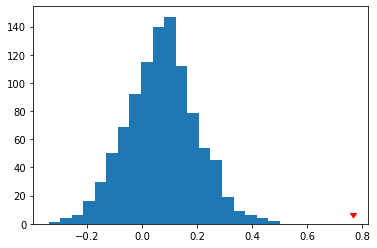

In [31]:
cas.bootstrap_group_score_fc_histogram(mrna_fc, genes_down_10000)

By stander of genes:



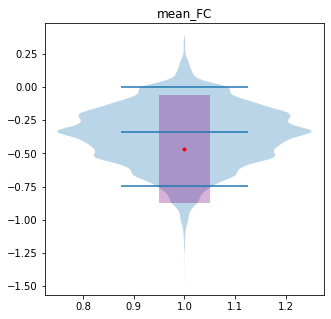

Gene - spr-2

Value:	-0.47
Rank: 6388.0 (31.91%)



In [70]:
my_plots.plot_gene_atac_signal_distribution(exp_mss, 'spr-2', mean_flag=True)

In [48]:
genes_up_15, genes_down_15 = ut.get_nearby_genes_list(hrde_regulated, 15_000)
i_bootstrap_means, _ = cas.bootstrap_group_score(exp_hrde1.fc.mean(axis=1), genes_down_15)



missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00013153
missing gene: WBGene00019789
missing gene: WBGene00021673
missing gene: WBGene00000801
missing gene: WBGene00019517
bigger than 2 out of 1000 bootstrap iterations


In [52]:
v_line_mean = i_bootstrap_means.mean()

missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00013153
missing gene: WBGene00019789
missing gene: WBGene00021673
missing gene: WBGene00000801
missing gene: WBGene00019517
missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00013153
missing gene: WBGene00019789
missing gene: WBGene00021673
missing gene: WBGene00000801
missing gene: WBGene00019517
missing gene: WBGene00010271
missing gene: WBGene00045410
missing gene: WBGene00020164
missing gene: WBGene00021606
missing gene: WBGene00015989
missing gene: WBGene00018862
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: 

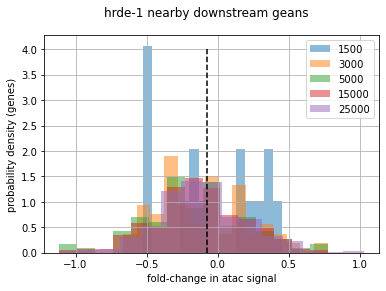

In [62]:
ds = [1500, 3000, 5000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    intersected_list = ut.intersect_lists(exp_hrde1.fc.index, genes_down)
    exp_hrde1.fc.loc[intersected_list,:].mean(axis=1).hist(bins=15, alpha=0.5, density=True)

plt.suptitle('hrde-1 nearby downstream geans')
plt.xlabel('fold-change in atac signal')
plt.ylabel('probability density (genes)')
plt.legend(ds)  
plt.vlines(v_line_mean, ymin=0, ymax=4, linestyles='dashed')


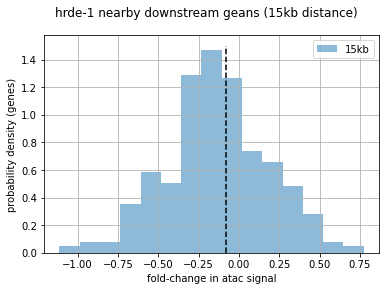

In [65]:
intersected_list_15 = ut.intersect_lists(exp_hrde1.fc.index, genes_down_15)
exp_hrde1.fc.loc[intersected_list_15,:].mean(axis=1).hist(bins=15, alpha=0.5, density=True)

plt.suptitle('hrde-1 nearby downstream geans (15kb distance)')
plt.xlabel('fold-change in atac signal')
plt.ylabel('probability density (genes)')
plt.legend(['15kb'])  
plt.vlines(v_line_mean, ymin=0, ymax=1.5, linestyles='dashed')